# TensorFlow

# Install on Windows 10

1. Make sure python and pip are installed. Update pip.
2. Install by pip using `pip install --upgrade tensorflow`

See [full install details](https://www.tensorflow.org/install/pip?hl=en#windows)

See [gpu setup](https://www.tensorflow.org/install/gpu?hl=en)

# A Simple Example using Keras

Import libraries

In [36]:
# basics
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#plt.style.use('seaborn')

# keras
import keras 
from keras import optimizers
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.metrics import CategoricalAccuracy, Recall, Precision, AUC
from keras.backend import clear_session
from keras.utils import np_utils

# sci-kit learn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.metrics import roc_auc_score, RocCurveDisplay, accuracy_score, precision_score, recall_score, precision_recall_curve, multilabel_confusion_matrix, ConfusionMatrixDisplay


Set up data

In [28]:
# read file
file_path = '../pandas/data/iris.csv'
df = pd.read_csv(file_path)
print(df.info())
print(df.columns)

# feature-target split
RSEED = 40
X = df[df.columns[:-1]]
y = df['species']

# label encoding
le = LabelEncoder()
le.fit(y)
print('Classes of the data', le.classes_)
y_int = le.transform(y) # class to integer
y_encoded = np_utils.to_categorical(y_int) # integer to one-hot encode

# train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=RSEED)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None
Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')
Classes of the data ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


Scale the features

In [20]:
# scale features
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = pd.DataFrame(scaler.transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)
X_train_scaled.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,120.000000,120.000000,120.000000,120.000000
mean,0.414762,0.445833,0.461158,0.448611
std,0.237317,0.182830,0.301678,0.318092
min,0.000000,0.000000,0.000000,0.000000
25%,0.200000,0.333333,0.084746,0.083333
50%,0.400000,0.416667,0.567797,0.500000
75%,0.571429,0.541667,0.694915,0.708333
max,1.000000,1.000000,1.000000,1.000000


Set up neural network

In [45]:
model = Sequential()
model.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu', input_dim = X_train_scaled.shape[1]))
#model.add(Dropout(0.2))
#model.add(Dense(units = 10, kernel_initializer = 'uniform', activation = 'relu'))
#model.add(Dropout(0.2))
model.add(Dense(units = 3, kernel_initializer = 'uniform', activation = 'softmax'))

Compile the model

In [46]:
# set up optimizer if needed
#optz = tf.keras.optimizers.SGD(learning_rate = 0.01, momentum = 0.0, nesterov = False)
#optz = tf.keras.optimizers.Adam(learning_rate = 0.001, beta_1 = 0.9, beta_2 = 0.999, amsgrad = False)

# compile the model
model.compile(optimizer = 'adam', 
              loss = 'categorical_crossentropy', 
              metrics = ['accuracy']
              )
print(model.summary())

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 8)                 40        
                                                                 
 dense_9 (Dense)             (None, 3)                 27        
                                                                 
Total params: 67
Trainable params: 67
Non-trainable params: 0
_________________________________________________________________
None


Train the Model

Epoch 1/600
1/1 [==============================] - 0s 116ms/step - loss: 0.8837 - accuracy: 0.7083 - val_loss: 0.9180 - val_accuracy: 0.5833
Epoch 2/600
1/1 [==============================] - 0s 45ms/step - loss: 0.8819 - accuracy: 0.7083 - val_loss: 0.9162 - val_accuracy: 0.5833
Epoch 3/600
1/1 [==============================] - 0s 45ms/step - loss: 0.8801 - accuracy: 0.7083 - val_loss: 0.9144 - val_accuracy: 0.5833
Epoch 4/600
1/1 [==============================] - 0s 49ms/step - loss: 0.8783 - accuracy: 0.7083 - val_loss: 0.9126 - val_accuracy: 0.5833
Epoch 5/600
1/1 [==============================] - 0s 41ms/step - loss: 0.8765 - accuracy: 0.7083 - val_loss: 0.9109 - val_accuracy: 0.5833
Epoch 6/600
1/1 [==============================] - 0s 36ms/step - loss: 0.8746 - accuracy: 0.7083 - val_loss: 0.9091 - val_accuracy: 0.5833
Epoch 7/600
1/1 [==============================] - 0s 35ms/step - loss: 0.8728 - accuracy: 0.7083 - val_loss: 0.9073 - val_accuracy: 0.5833
Epoch 8/600
1/1 [==

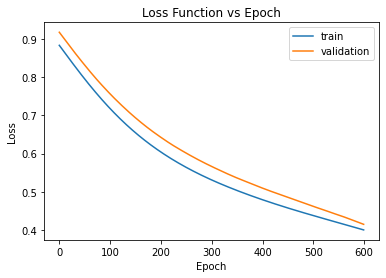

In [48]:
# Train the ANN
#training = model.fit(X_train, y_train, batch_size = 10000, validation_split=0.2, epochs = 100, class_weight={0:1.0, 1:1000.0})
training = model.fit(X_train_scaled, y_train, batch_size = 10000, validation_split=0.2, epochs = 600, verbose=1)

# plot the cost function over epoch
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('Loss Function vs Epoch')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

Make Predictions

In [49]:
# prediction
y_train_pred = model.predict(X_train_scaled)
y_test_pred = model.predict(X_test_scaled)

# plot confusion matrix
# cf = confusion_matrix(y_test, y_test_pred.round(0))
# display = ConfusionMatrixDisplay(cf)
# display.plot()

1/1 [==============================] - 0s 20ms/step


In [50]:
y_in = y_test_pred

y_out = []
for sample in y_in:
    y_out.append(sample.argmax())
y_out

[0,
 1,
 2,
 2,
 1,
 2,
 2,
 1,
 1,
 0,
 1,
 0,
 0,
 2,
 1,
 2,
 2,
 2,
 2,
 1,
 2,
 2,
 2,
 0,
 1,
 0,
 0,
 2,
 0,
 1]

In [51]:
y_int

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [52]:
y_test_pred

array([[0.8785111 , 0.10329975, 0.01818917],
       [0.05961557, 0.47912934, 0.4612551 ],
       [0.0058511 , 0.30205888, 0.69209003],
       [0.00279874, 0.25178704, 0.7454142 ],
       [0.06068058, 0.49065712, 0.4486623 ],
       [0.00559312, 0.2941751 , 0.70023185],
       [0.01180665, 0.37623554, 0.6119578 ],
       [0.06717077, 0.49371192, 0.4391173 ],
       [0.06666499, 0.48415756, 0.44917738],
       [0.9075662 , 0.08057198, 0.01186187],
       [0.06355133, 0.49185428, 0.44459438],
       [0.8996063 , 0.08676105, 0.01363264],
       [0.90849954, 0.07965197, 0.01184853],
       [0.01382763, 0.37585747, 0.61031497],
       [0.1449999 , 0.5261254 , 0.32887477],
       [0.00273478, 0.24986088, 0.7474043 ],
       [0.0101967 , 0.3544668 , 0.6353365 ],
       [0.00625422, 0.3083464 , 0.68539935],
       [0.02097415, 0.4169284 , 0.56209743],
       [0.08629384, 0.502994  , 0.41071212],
       [0.00304475, 0.26413512, 0.7328201 ],
       [0.00099738, 0.2011953 , 0.79780734],
       [0.